In [5]:

# import the required python libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# data flow parameters
training_data_dir = 'C:/Users/ASUS/data/Training'
validation_data_dir = 'C:/Users/ASUS/data/Validation'
batch_size = 24
img_width = 128
img_height = 128
num_channels = 3
num_classes = 6

# image generators
training_generator = ImageDataGenerator(rescale = 1./255)
validation_generator = ImageDataGenerator(rescale = 1./255)

# image flows
training_set = training_generator.flow_from_directory(directory = training_data_dir,
                                                      target_size = (img_width, img_height),
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical')

validation_set = validation_generator.flow_from_directory(directory = validation_data_dir,
                                                                      target_size = (img_width, img_height),
                                                                      batch_size = batch_size,
                                                                      class_mode = 'categorical')

Found 6231 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


In [11]:

# network architecture
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', input_shape = (img_width, img_height, num_channels)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(24))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# compile network
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# view network architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 24)                  │         786,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 24)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 797,200 (3.04 MB)

 Trainable params: 797,200 (3.04 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
num_classes = len(training_set.class_indices)  # Number of unique classes
print(num_classes)

24


In [12]:

# training parameters
num_epochs = 50
model_filename = 'C:/Users/ASUS/models/fruits_cnn_v01.keras'

# callbacks
save_best_model = ModelCheckpoint(filepath = model_filename,
                                  monitor = 'val_accuracy',
                                  mode = 'max',
                                  verbose = 1,
                                  save_best_only = True)

# train the network
history = model.fit(x = training_set,
                    validation_data = validation_set,
                    batch_size = batch_size,
                    epochs = num_epochs,
                    callbacks = [save_best_model])

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.3133 - loss: 2.3367
Epoch 1: val_accuracy improved from -inf to 0.86159, saving model to C:/Users/ASUS/models/fruits_cnn_v01.keras
260/260 ━━━━━━━━━━━━━━━━━━━━ 91s 341ms/step - accuracy: 0.3141 - loss: 2.3337 - val_accuracy: 0.8616 - val_loss: 0.4085
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.9075 - loss: 0.3506
Epoch 2: val_accuracy improved from 0.86159 to 0.99261, saving model to C:/Users/ASUS/models/fruits_cnn_v01.keras
260/260 ━━━━━━━━━━━━━━━━━━━━ 78s 302ms/step - accuracy: 0.9076 - loss: 0.3501 - val_accuracy: 0.9926 - val_loss: 0.1067
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.9947 - loss: 0.1018
Epoch 3: val_accuracy improved from 0.99261 to 1.00000, saving model to C:/Users/ASUS/models/fruits_cnn_v01.keras
260/260 ━━━━━━━━━━━━━━━━━━━━ 81s 311ms/step - accuracy: 0.9947 - loss: 0.1018 - val_accuracy: 1.0000 - val_loss: 0.0749
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━

260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 1.0000 - loss: 5.6088e-05
Epoch 25: val_accuracy did not improve from 1.00000
260/260 ━━━━━━━━━━━━━━━━━━━━ 84s 323ms/step - accuracy: 1.0000 - loss: 5.6054e-05 - val_accuracy: 1.0000 - val_loss: 4.4681e-05
Epoch 26/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 1.0000 - loss: 3.8315e-05
Epoch 26: val_accuracy did not improve from 1.00000
260/260 ━━━━━━━━━━━━━━━━━━━━ 84s 321ms/step - accuracy: 1.0000 - loss: 3.8319e-05 - val_accuracy: 1.0000 - val_loss: 3.9286e-05
Epoch 27/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 1.0000 - loss: 3.6755e-05
Epoch 27: val_accuracy did not improve from 1.00000
260/260 ━━━━━━━━━━━━━━━━━━━━ 86s 332ms/step - accuracy: 1.0000 - loss: 3.6745e-05 - val_accuracy: 1.0000 - val_loss: 3.3732e-05
Epoch 28/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 1.0000 - loss: 2.9971e-05
Epoch 28: val_accuracy did not improve from 1.00000
260/260 ━━━━━━━━━━━━━━━━━━━━ 97s 372ms/step - ac

260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 1.0000 - loss: 1.5676e-06
Epoch 49: val_accuracy did not improve from 1.00000
260/260 ━━━━━━━━━━━━━━━━━━━━ 69s 266ms/step - accuracy: 1.0000 - loss: 1.5674e-06 - val_accuracy: 1.0000 - val_loss: 1.5923e-06
Epoch 50/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 1.0000 - loss: 1.6007e-06
Epoch 50: val_accuracy did not improve from 1.00000
260/260 ━━━━━━━━━━━━━━━━━━━━ 67s 258ms/step - accuracy: 1.0000 - loss: 1.5997e-06 - val_accuracy: 1.0000 - val_loss: 1.3603e-06


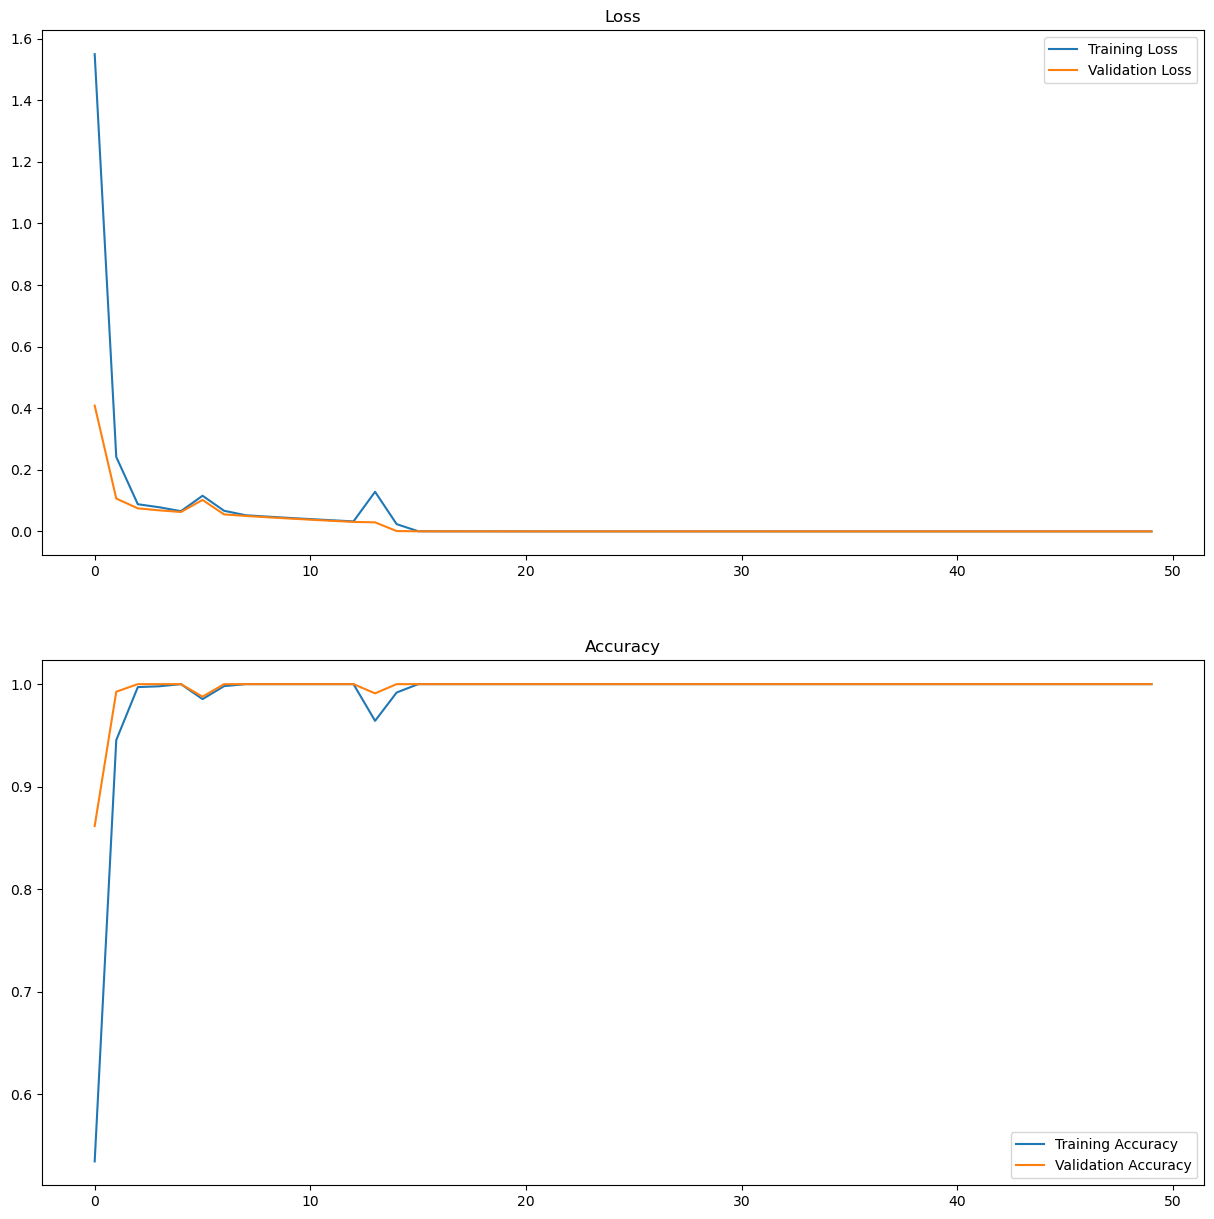

1.0

In [13]:

import matplotlib.pyplot as plt

# plot validation results
fig, ax = plt.subplots(2, 1, figsize=(15,15))
ax[0].set_title('Loss')
ax[0].plot(history.epoch, history.history["loss"], label="Training Loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(history.epoch, history.history["accuracy"], label="Training Accuracy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()
plt.show()

# get best epoch performance for validation accuracy
max(history.history['val_accuracy'])